# Различаем птиц и самолеты
***

In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

In [2]:
from torchvision import datasets
data_path = './data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data-unversioned/p1ch7/
    Split: Train

Аналогично CIFAR10 подмодуль datasets предоставляет доступ и к другим наиболее популярным наборам данных машинного зрения, в частности MNIST,
Fashion-MNIST, CIFAR-100, SVHN, Coco и Omniglot. Во всех случаях набор
данных возвращается в виде подкласса torch.utils.data.Dataset. Как можно
видеть, он указан в качестве базового класса в порядке разрешения методов
нашего экземпляра cifar10

In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

## Класс Dataset

Пора выяснить, что на практике значит «подкласс torch.utils.data.Dataset». 
Из рис. 7.2 понятно, что представляет собой объект Dataset PyTorch. Он должен
реализовывать два метода: __len__ и __getitem__, первый из которых должен
возвращать количество элементов набора данных, а второй — элемент данных,
состоящий из примера данных и соответствующей метки (числового индекса)2

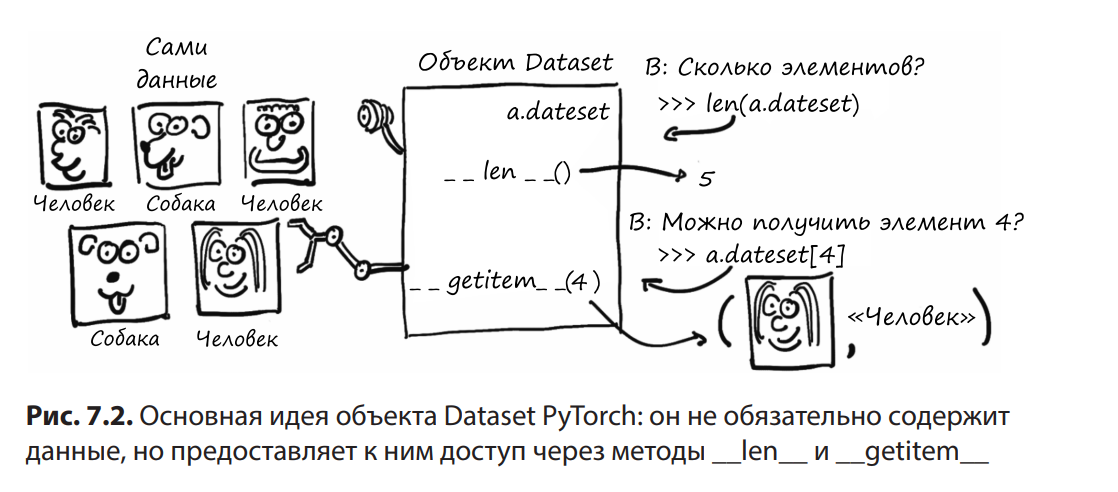

На практике, когда у объекта Python есть метод __len__, его можно передать
в качестве аргумента встроенной функции len языка Python:

In [5]:
len(cifar10.data)

50000

Аналогично, поскольку у объекта Dataset есть метод __getitem__, можно воспользоваться стандартным способом доступа по индексу к кортежам и спискам для
обращения к отдельным элементам. В данном случае мы получаем изображение
типа PIL (библиотека Python для работы с изображениями, пакет PIL), а также
интересующий нас результат — целочисленное значение 1, соответствующее
метке «автомобиль»

In [6]:
img, label = cifar10[99]
img, label, cifar10.classes[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

Итак, пример данных из набора data.CIFAR10 представляет собой экземпляр
изображения PIL RGB. Можно сразу же вывести его на экран

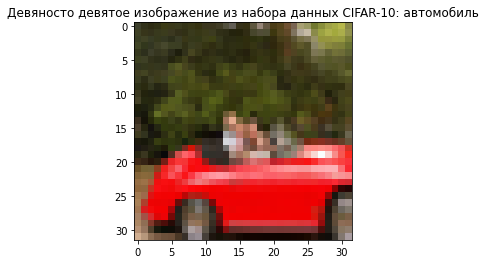

In [7]:
plt.imshow(img)
plt.title("Девяносто девятое \
изображение из набора \
данных CIFAR-10: автомобиль")
plt.show()

## Преобразования объектов Dataset

Все это хорошо, но нам нужно преобразовать изображение PIL в тензор PyTorch,
чтобы с ним что-то делать. Тут нам пригодится модуль torchvision.transforms,
где описан набор компонуемых и подобных функциям объектов, которые можно передавать в качестве аргументов в наборы данных torchvision, например
datasets.CIFAR10(…), и преобразовывать данные после их загрузки, но перед
возвратом их методом __getitem__. Вот список доступных объектов:

In [8]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

Среди этих преобразований можно заметить **ToTensor**, превращающее массивы
NumPy и изображения PIL в тензоры. Оно также располагает измерения выходного тензора в порядке C × H × W (каналы, высота, ширина; точно как у нас
в главе 4)

Попробуем преобразование ToTensor в действии. После создания экземпляра
его можно вызвать как обычную функцию, передав изображение PIL в качестве
аргумента, и получить в качестве результата тензор:

In [9]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

Изображение превратилось в тензор формы 3 × 32 × 32, то есть в изображение
размером 32 × 32 с тремя цветовыми каналами (RGB)

Как мы и предполагали, можно передать это преобразование непосредственно
в виде аргумента dataset.CIFAR10:

In [10]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
 transform=transforms.ToTensor())

In [11]:
img_t, class_t = tensor_cifar10[99]
type(img_t)

torch.Tensor

Как и можно было ожидать, первое измерение этого тензора является каналом,
а тип скалярных значений — float32:

In [12]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

Если значения в исходном изображении PIL находились в диапазоне от 0 до 255
(8 бит на канал), то ToTensor преобразует данные в 32-битные значения с плавающей запятой на канал, масштабируя их к диапазону от 0,0 до 1,0. Проверим это:

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

Проверим также, что на выходе получается то же самое изображение:

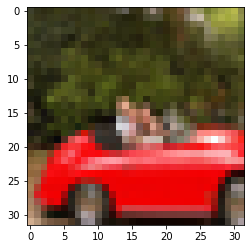

In [14]:
plt.imshow(img_t.permute(1, 2, 0)) # Порядок осей координат меняется с C × H × W на H × W × C

Все правильно. Обратите внимание, что нам пришлось воспользоваться permute,
чтобы поменять порядок осей координат **C × H × W на H × W × C**, ожидаемый
Matplotlib.

## Нормализация данных

Преобразования очень удобны, поскольку их можно организовывать цепочкой
с помощью transforms.Composeи они обеспечивают четкую и ясную нормализацию 
и дополнение данных непосредственно при их загрузке. Например, рекомендуемой
практикой считается нормализовать набор данных до нулевого среднего значения
и единичного стандартного отклонения по каждому из каналов. Мы уже упоминали
это в главе 4, но теперь, после главы 5, понимаем почему: при выборе функций
активации, линейных около нуля (плюс-минус 1 или 2), ограничение данных тем
же диапазоном повышает вероятность ненулевых градиентов нейронов, а значит,
и ускоряет обучение. Кроме того, нормализация каналов к одинаковому распределению гарантирует смешение и обновление информации из разных каналов
(посредством градиентного спуска) с одинаковой скоростью обучения. Точно как
в подразделе 5.4.4, когда мы приводили весовой коэффициент к тому же порядку
величины, что и смещение, в нашей модели преобразования температур.
Чтобы обеспечить нулевое среднее значение и единичное стандартное отклонение
по каждому из каналов, необходимо вычислить среднее значение и стандартное
отклонение каждого из каналов набора данных и применить следующее преобразование: **v_n[c] = (v[c] - mean[c]) / stdev[c]**. Именно это и делает преобразование **transforms.Normalize**. Значения mean и stdev необходимо вычислить
отдельно (преобразование их не вычисляет). Давайте вычислим их для обучающего набора данных CIFAR-10.


Поскольку набор данных CIFAR-10 невелик, можно работать с ним полностью
в оперативной памяти. Разместим все возвращаемые объектом Dataset тензоры
последовательно в дополнительном измерении:

In [15]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

Теперь можно легко вычислить поканальные средние значения:

In [16]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

Стандартное отклонение вычисляется аналогично

In [17]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

Вычислив эти значения, мы можем произвести преобразование Normalize

In [18]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [19]:
transformed_cifar10 = datasets.CIFAR10(
 data_path, train=True, download=False,
 transform=transforms.Compose([
 transforms.ToTensor(),
 transforms.Normalize((0.4915, 0.4823, 0.4468),
 (0.2470, 0.2435, 0.2616))
 ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


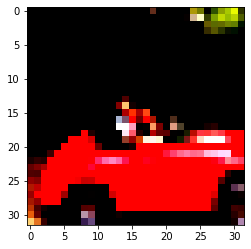

In [20]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

На рис. 7.5 показана наша нормализованная красная машина. Такая картина возникает потому, что нормализация сдвинула уровни RGB за пределы диапазона
[0,0, 1,0] и изменила порядки значений каналов. Данные никуда не пропали;
просто Matplotlib визуализирует их в черном цвете. Запомним это на будущее.

## Различаем птиц и самолеты

Джейн, наш друг из орнитологического клуба, установила в лесу к югу от аэропорта множество камер, которые автоматически делают снимок, когда что-то
попадает в кадр, и загружают в работающий в реальном времени блог наблюдения за птицами. Проблема в том, что камеры срабатывают на множество самолетов, прилетающих в аэропорт и вылетающих из него. Поэтому Джейн тратит
немало времени на удаление из блога фотографий самолетов. Ей необходима
автоматизированная система вроде той, что показана на рис. 7.6. Вместо того
чтобы удалять фотографии вручную, она хотела бы воспользоваться нейронной
сетью — искусственным интеллектом, говоря языком маркетологов, — чтобы
сразу же отфильтровывать самолеты

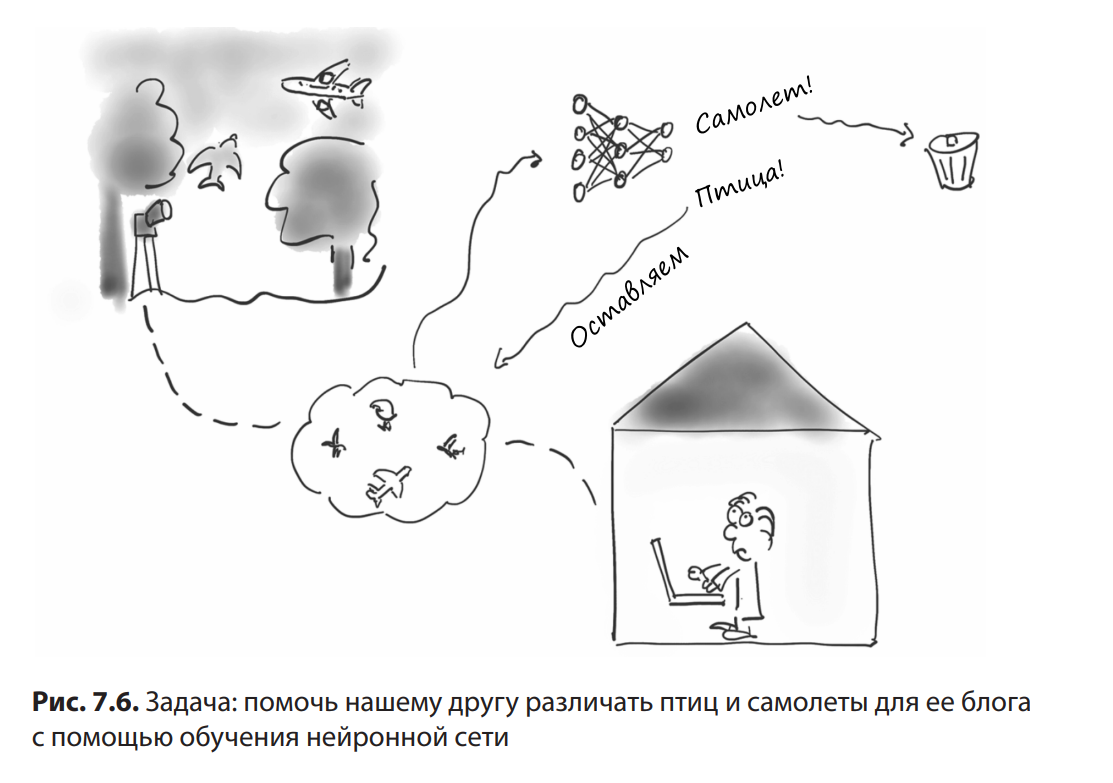

Легко! Будет сделано без проблем — у нас как раз есть идеальный набор данных
для этой цели (какое совпадение, правда?). Мы выберем всех птиц и самолеты
из нашего набора данных CIFAR-10 и создадим нейронную сеть, способную их
различать между собой

# Формирование набора данных
***

Первый этап — приведение данных в правильную форму. Мы создадим подкласс Dataset, включающий только птиц и самолеты. Однако набор данных мал,
и для работы с ним нам нужен лишь доступ по индексу и len. Так что вовсе не
обязательно делать подкласс torch.utils.data.dataset.Dataset! Почему бы не
упростить себе задачу и просто фильтровать данные из cifar101
, перераспределив
метки так, чтобы они остались непрерывными? Вот так

In [21]:
import tqdm

In [22]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
         for img, label in cifar10
         if label in [0, 2]]
cifar2_val = [(img, label_map[label])
         for img, label in cifar10_val
         if label in [0, 2]]

Объект cifar2 удовлетворяет основным требованиям к Dataset — в нем описаны
методы __len__ и __getitem__, — так что мы можем им воспользоваться. Впрочем,
осторожнее, мы тут «срезаем углы» с соответствующими ограничениями, так что,
возможно, в некоторых случаях имеет смысл реализовать полноценный Dataset2
.


У нас есть набор данных! Далее нам понадобится модель, в которую мы эти
данные будем подавать.

## Полносвязная модель

Мы научились создавать нейронные сети в главе 5. И знаем, что на входе и выходе
ее должны быть тензоры признаков. В конце концов, изображение представляет
собой всего лишь набор чисел, расположенных в соответствии с пространственными координатами. Хорошо, мы пока что не знаем, что делать с этими
координатами, но чисто теоретически, если вытянуть пиксели изображения
в один длинный одномерный вектор, их же можно рассматривать как входные
признаки, правда? Этот процесс иллюстрирует рис. 7.7.

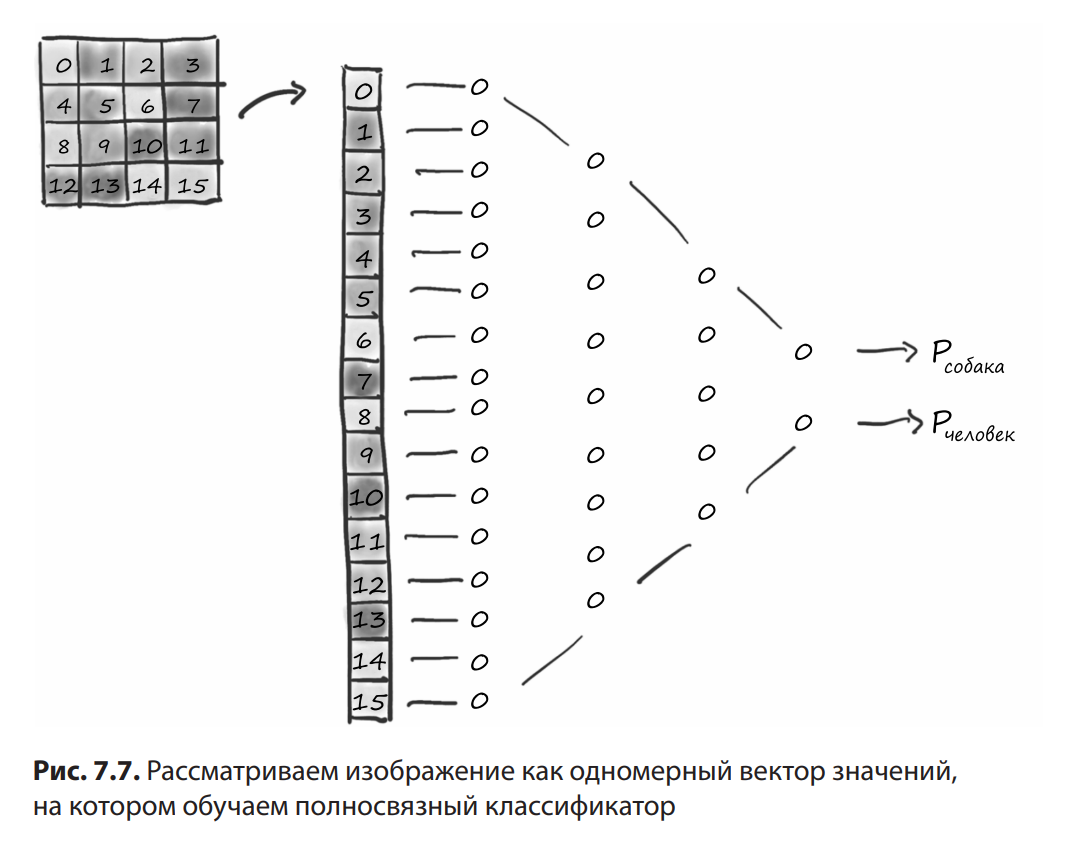


Давайте попробуем. Сколько признаков содержит каждый пример данных?
Так, 3 × 32 × 32 равняется 3072 входных признака на каждый пример. Начиная
с созданной в главе 5 модели, получаем новую модель nn.Linear с 3072 входными
признаками и некоторым количеством скрытых признаков, за которым следует
функция активации, а затем еще один nn.Linear, сокращающий модель до соответствующего количества выходных признаков (в данном случае 2)

In [23]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(
 nn.Linear(
 3072, # Входные признаки
 512, # Скрытый слой
 ),
 nn.Tanh(),
 nn.Linear(
 512, # Скрытый слой
 n_out, # Выходные признаки
       )
)

Количество 512 скрытых признаков мы выбрали несколько произвольным образом. Нейронной сети требуется по крайней мере один скрытый слой (активации,
поэтому два модуля) с нелинейностью между слоями, чтобы сеть могла усваивать произвольные функции так, как мы обсуждали в разделе 6.3, в противном
случае модель будет просто линейной. Скрытые признаки отражают (усвоенные
сетью) взаимосвязи между входными сигналами, закодированные в матрице
весов. Сама по себе модель может научиться «сравнивать» элементы 176 и 208
вектора, но априори она не знает, что необходимо обратить на них внимание,
поскольку структурно не знает, что они располагаются в (строка 5, пиксель 16)
и (строка 6, пиксель 16), а значит — смежные.

## Выходной сигнал классификатора

В главе 6 сеть выдавала в качестве выходного сигнала предсказанную температуру (число с количественным значением). Можно и тут сделать нечто подобное: сделать так, чтобы наша сеть выдавала на выходе одно скалярное значение
(то есть n_out = 1), привести тип меток к float (0,0 для самолета и 1,0 для птицы)
и использовать их в качестве целевой величины для MSELoss (среднее значение
квадратов разностей в батче). При этом задача сведется к задаче регрессии. 
Однако если взглянуть внимательнее, станет ясно, что мы имеем дело с чем-то
принципиально другим1
.
Необходимо понять, что выходной сигнал носит категориальный характер:
птица или самолет (либо что-то еще, если мы используем все десять исходных
классов). Как мы узнали из главы 4, для представления категориальной величины следует воспользоваться унитарным ее кодированием, например, [1, 0]
для самолета и [0, 1] для птицы (порядок выбран произвольно). Такая схема
подходит и в случае десяти классов, как в полном наборе данных CIFAR-10;
просто вектор будет длиной 102


В идеальном случае сеть должна выдавать на выходе torch.tensor([1.0, 0.0])
для самолета и torch.tensor([0.0, 1.0]) — для птицы. На практике же, поскольку наш классификатор не будет идеален, следует ожидать от сети неких
промежуточных значений. Главное в этом случае, что мы можем интерпретировать выходные сигналы как вероятности: первая запись — вероятность класса
'airplane', а вторая — 'bird'

Изложение задачи на языке вероятностей накладывает несколько дополнительных ограничений на выходные сигналы нашей сети

* Все элементы выходного сигнала должны находиться в диапазоне [0.0, 1.0] (вероятность исхода не может быть меньше 0 или больше 1).
* Сумма элементов выходного сигнала должна равняться 1.0 (мы уверены, что имеет место один из двух исходов)

Выглядит довольно жестким ограничением на числовой вектор с учетом требования дифференцируемости. Но существует очень ловкий прием, позволяющий
его реализовать: многомерная логистическая функция (softmax)

## Представление выходного сигнала в качестве вероятностей

Многомерная логистическая функция принимает на входе вектор значений
и возвращает другой вектор той же размерности, в котором значения удовлетворяют только что перечисленным ограничениям для вероятностей. Выражение
для многомерной логистической функции приведено на рис. 7.8.
Другими словами, мы берем элементы вектора, вычисляем поэлементно экспоненту от них и делим каждый из элементов на сумму экспонент. В виде кода это
выглядит примерно следующим образом:

In [24]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [25]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

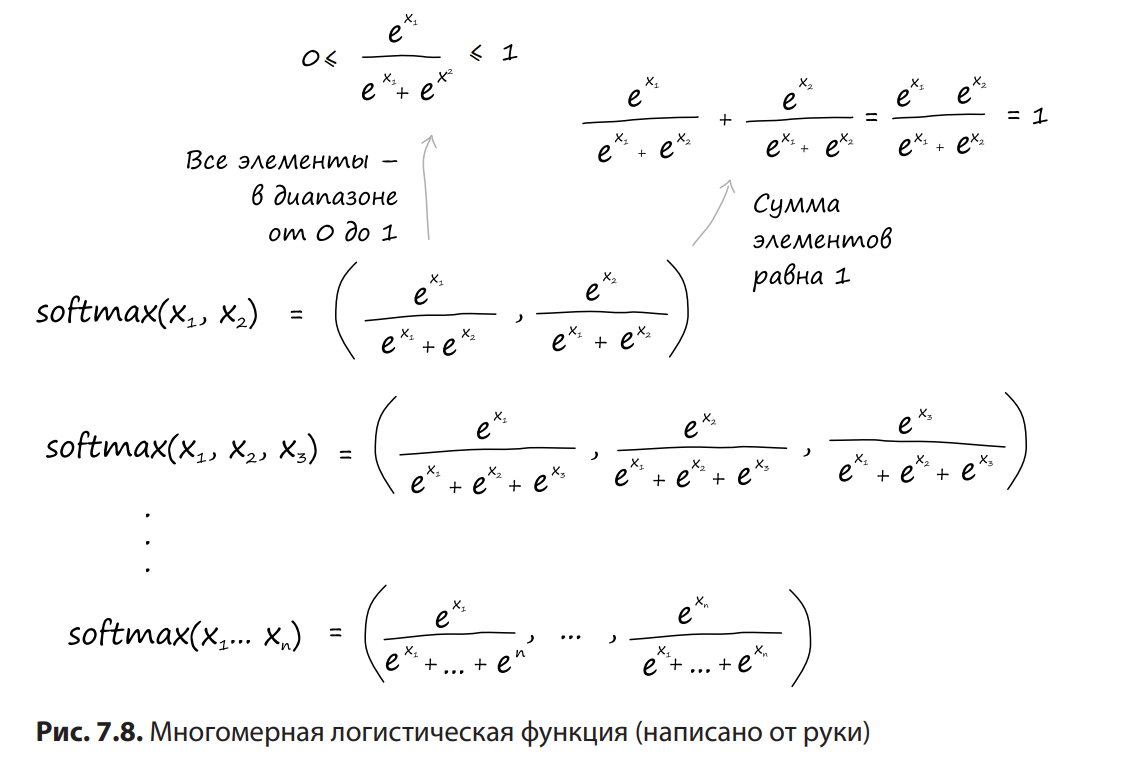

Как и ожидалось, полученное удовлетворяет ограничениям, накладываемым
на вероятность

In [26]:
softmax(x).sum()

tensor(1.)

Многомерная логистическая функция монотонна, в том смысле, что меньшие
входные значения соответствуют меньшим выходным. Однако она не является
масштабно инвариантной (scale invariant), в том смысле, что соотношения значений не сохраняются. На самом деле отношение первого и второго элементов
входного сигнала равно 0,5, а отношение тех же элементов выходного сигнала —
0,3678. Это не проблема, поскольку процесс обучения приводит параметры
модели к нужным соотношениям.


Многомерная логистическая функция доступна в nn в виде модуля. Поскольку,
как обычно, у входных тензоров может быть дополнительное нулевое измерение
батчей либо могут быть измерения, по которым кодируются вероятности, а также другие измерения, по которым не кодируются, nn.Softmax требует указания
измерения, по которому применяется многомерная логистическая функция:

In [27]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
 [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

В данном случае у нас два входных вектора в двух строках (так же, как когда
мы работали по батчам), так что мы указываем измерение 1 в качестве рабочего
для nn.Softmax.

Замечательно! Можно теперь добавить многомерную логистическую функцию
в конец нашей модели, и сеть будет готова выдавать вероятности:

In [28]:
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.Softmax(dim=1))

Можно даже попробовать модель в работе, прежде чем ее обучать. Давайте попробуем, просто чтобы посмотреть, что получится. Сначала сформируем батч
из одного изображения, птицы (рис. 7.9).

In [29]:
data_path = './data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [30]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


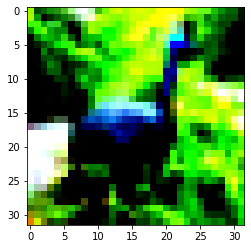

In [31]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

Ой, чуть не забыли. Для вызова модели у входного сигнала должны быть правильные измерения. Вспоминаем, что модель ожидает 3072 входных признака
и что nn имеет дело с данными, организованными в батчи по нулевому измерению. 
Так что нам нужно преобразовать наше изображение формы 3 × 32 × 32 в одномерный тензор, а затем добавить еще одно измерение на нулевой позиции. Мы
уже знаем, как это делать, из главы 3:

In [32]:
img

tensor([[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
         [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
         [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
         ...,
         [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
         [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
         [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],

        [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
         [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
         [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
         ...,
         [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
         [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
         [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],

        [[-0.4487, -0.7935, -0.1939,  ..., -0.6136, -0.6736, -0.8535],
         [-0.4487, -0.9734, -1.0634,  ..., -0

In [33]:
img_batch = img.view(-1).unsqueeze(0)

In [34]:
out = model(img_batch)
out

tensor([[0.4720, 0.5280]], grad_fn=<SoftmaxBackward0>)

О, мы получили вероятности! Впрочем, радоваться рано: веса и смещения наших
линейных слоев вообще не были обучены. PyTorch взял начальные значения их
элементов случайным образом из промежутка от –1,0 до 1,0. Что интересно, в качестве результатов мы получили также grad_fn — верхушку графа вычислений
обратного прохода (он используется при обратном распространении ошибки)

Кроме того, хотя мы знаем, какая выходная вероятность соответствует какому
классу (вспомните наши class_names), сеть никак это не демонстрирует. Первая —
airplane, а вторая — bird или наоборот? На данном этапе сеть не знает даже этого. 
Смысл этим двум числам придает функция потерь после обратного распространения ошибки. Если индексы меток 0 для airplane и 1 — для bird, то именно такой
порядок выходных сигналов и подразумевается. Следовательно, после обучения
мы сможем получить метки в виде индексов путем вычисления аргумента максимизации (argmax) индекса, при котором вероятность достигает максимального
значения. Функция torch.max, что очень удобно при передаче ей в качестве аргумента измерения, возвращаетмаксимальный элемент по этому измерению, а также
соответствующий ему индекс. В нашем случае необходимо взять максимум по
измерению вектора вероятности (не по измерению батчей), то есть измерению 1:

In [35]:
_, index = torch.max(out, dim=1)
index

tensor([1])

Итак, модель говорит, что на изображении — птица. Просто повезло. Но мы
адаптировали выходной сигнал нашей модели к текущей задаче классификации. 
Кроме того, мы запустили нашу модель для входного изображения и проверили,
что наше рукоделие работает. Пора приступить к обучению сети. Как и в предыдущих двух главах, необходимо выбрать функцию потерь для минимизации
во время обучения.

## Функция потерь для классификации

Мы уже упоминали, что именно функция потерь придает вероятностям смысл. 
В главах 5 и 6 в качестве функции потерь применялась среднеквадратичная
ошибка (MSE). Можно и здесь воспользоваться ею, добиваясь сходимости выходных вероятностей к [0.0, 1.0] и [1.0, 0.0]. Однако, если задуматься, становится ясно, что сами по себе эти значения нас не интересуют. Если взглянуть
опять на операцию argmax, то можно увидеть, что на самом деле нас интересует
то, что первая вероятность больше второй для самолетов и наоборот — для птиц. 
Другими словами, необходимо накладывать штраф на ошибки классификации,
а не кропотливо штрафовать все, что не равно в точности 0,0 или 1,0.
В этом случае необходимо максимизировать вероятность, соответствующую истинному классу out[class_index], где out — выходной сигнал многомерной логистической функции, а class_index — вектор, содержащий 0 для [метки] airplane
(самолет) и 1 — для bird (птица). Эта величина — соответствующая истинному
классу вероятность — называется правдоподобием (истинность параметров нашей
модели при имеющихся данных)1
. Другими словами, нам нужна функция потерь,
принимающая очень высокие значения, когда правдоподобие низко: настолько
низко, что вероятности альтернативных вариантов выше. И наоборот, потери
должны быть низкими, когда правдоподобие данного варианта выше, чем у альтернатив, и мы не хотим зацикливаться на доведении вероятности до 1.
Действующая подобным образом функция потерь существует и называется отрицательной логарифмической функцией правдоподобия (negative log likelihood, NLL). 
Выражение для ее вычисления выглядит вот так: NLL = - sum(log(out_i[c_i])),
где суммирование производится по N примерам данных, а c_i — истинный класс
примера данных i. Взглянем на рис. 7.10, на котором изображен график NLL
как функции от предсказанной вероятности.
Как видно из этого рисунка, NLL стремится к бесконечности, когда модель присваивает данным низкие вероятности, и уменьшается до относительно низких
значений, когда вероятности больше 0,5. Учтите, что в качестве входного сигнала
NLL принимает вероятности, так что при росте правдоподобия другие вероятности неизбежно уменьшаются.

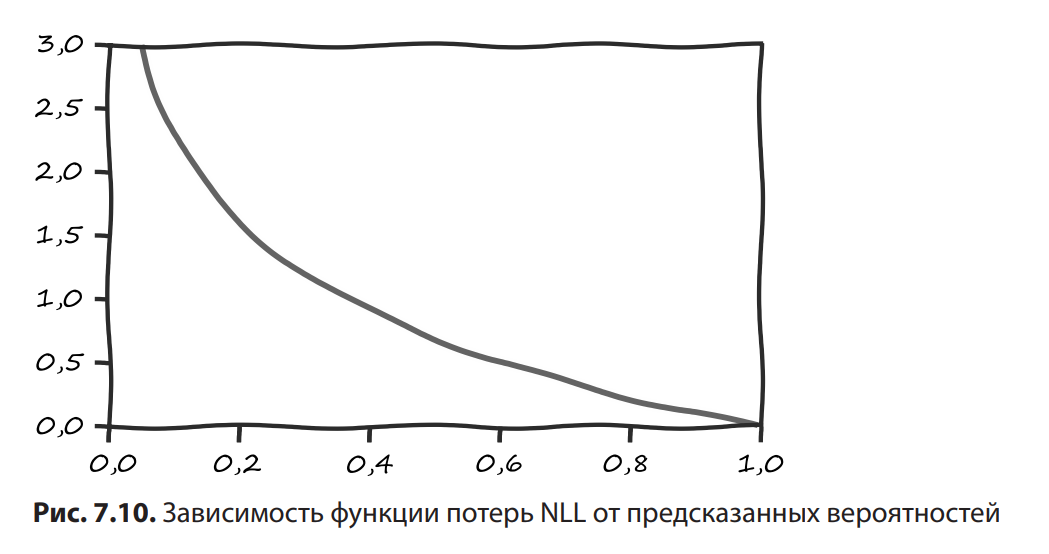

Подытоживая, нашу функцию потерь для классификации можно вычислить
следующим образом. Для каждого примера данных в батче мы делаем следующее.
1. Производим прямой проход и получаем выходные значения из последнего (линейного) слоя.
2. Вычисляем для них многомерную логистическую функцию и получаем вероятности.
3. Извлекаемпредсказанную вероятность для истинного класса (правдоподобие параметров). Отметим, что истинный класс известен, поскольку обучение производится с учителем, — это наши эталонные данные.
4. Вычисляем ее логарифм, ставим перед ним знак «минус» и прибавляем к потерям.


Итак, как же проделать вышеописанное в PyTorch? В PyTorch есть класс
nn.NLLLoss. Впрочем (внимание, подводный камень!), он принимает на входе
не вероятности, как можно ожидать, а тензор логарифмов вероятностей. А затем вычисляет для батча данных NLL нашей модели. Для такого соглашения
о входных данных есть веские основания: когда вероятность близка к нулю,
вычисление ее логарифма связано со сложностями. Выходом из ситуации будет
воспользоваться функцией nn.LogSoftmax вместо nn.Softmax, которая обеспечивает численную устойчивость вычислений.
Доработаем нашу модель, воспользовавшись nn.LogSoftmax в качестве выходного модуля:

In [36]:
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.LogSoftmax(dim=1))


In [37]:
loss = nn.NLLLoss()

In [38]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6217, grad_fn=<NllLossBackward0>)

In [39]:
out

tensor([[-0.7700, -0.6217]], grad_fn=<LogSoftmaxBackward0>)

В завершение нашего исследования функций потерь взглянем, насколько лучше
функция потерь на основе перекрестной энтропии, чем MSE. На рис. 7.11 виден
уклон графика функции потерь на основе перекрестной энтропии в том случае,
когда предсказание далеко от целевой величины (в углу, соответствующем низкому значению потерь, для истинного класса предсказывается вероятность 99,97 %),
в то время как отброшенная нами в самом начале MSE насыщается намного

# Обучение классификатора
***

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

Если присмотреться внимательнее, окажется, что мы кое-что изменили в цикле
обучения. В главе 5 цикл был один: по эпохам (напомним, что эпоха завершается
после обработки всех примеров данных в обучающем наборе). Мы поняли, что
обработка всех 10 000 изображений одним батчем — это перебор, так что решили
создать внутренний цикл, чтобы обрабатывать по одному примеру данных за
раз и производить обратное распространение ошибки по этому одному примеру

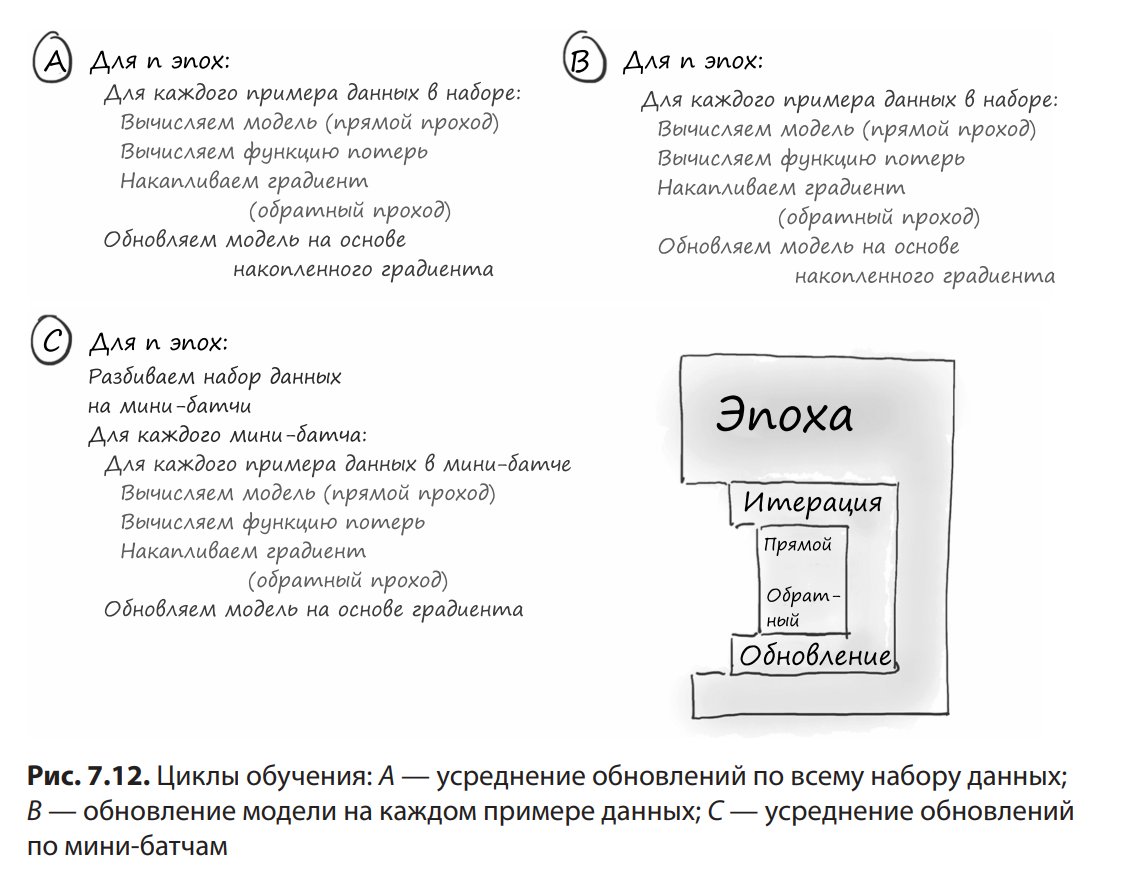

В то время как в первом случае градиент накапливается по всем примерамданных
перед применением, в этом случае мы применяем изменения к параметрам на
основе очень неполной оценки градиента, основанной на одном примере. Однако
направление, подходящее для снижения потерь на основе одного примера, может
оказаться неподходящим для других. Перетасовывая примеры данных на каждой
эпохе и вычисляя градиент по одному или (что желательно из соображений устойчивости) нескольким примерам данных за раз, мы фактически вносим элемент
случайности в алгоритм градиентного спуска. Помните SGD? Эта аббревиатура
расшифровывается как стохастический градиентный спуск, и S связан именно
с этим: с обработкой по небольшимбатчам(мини-батчам) перетасованных данных. 
Оказывается, что следование градиентам, вычисленным по мини-батчам, которые
представяют собой лишь слабые аппроксимации градиентов, вычисленных по
всему набору данных, улучшает сходимость и предотвращает «застревание» процесса оптимизации во встреченных по пути локальных минимумах. Как показано
на рис. 7.13, полученные из мини-батчей градиенты случайным образом отклоняются от идеального направления, и именно поэтому, в частности, желательно
использовать относительно малую скорость обучения. Благодаря перетасовке
набора данных на каждой эпохе улучшается представительность последовательности вычисленных по мини-батчам градиентов относительно тех градиентов,
которые были вычислены по всему набору данных.

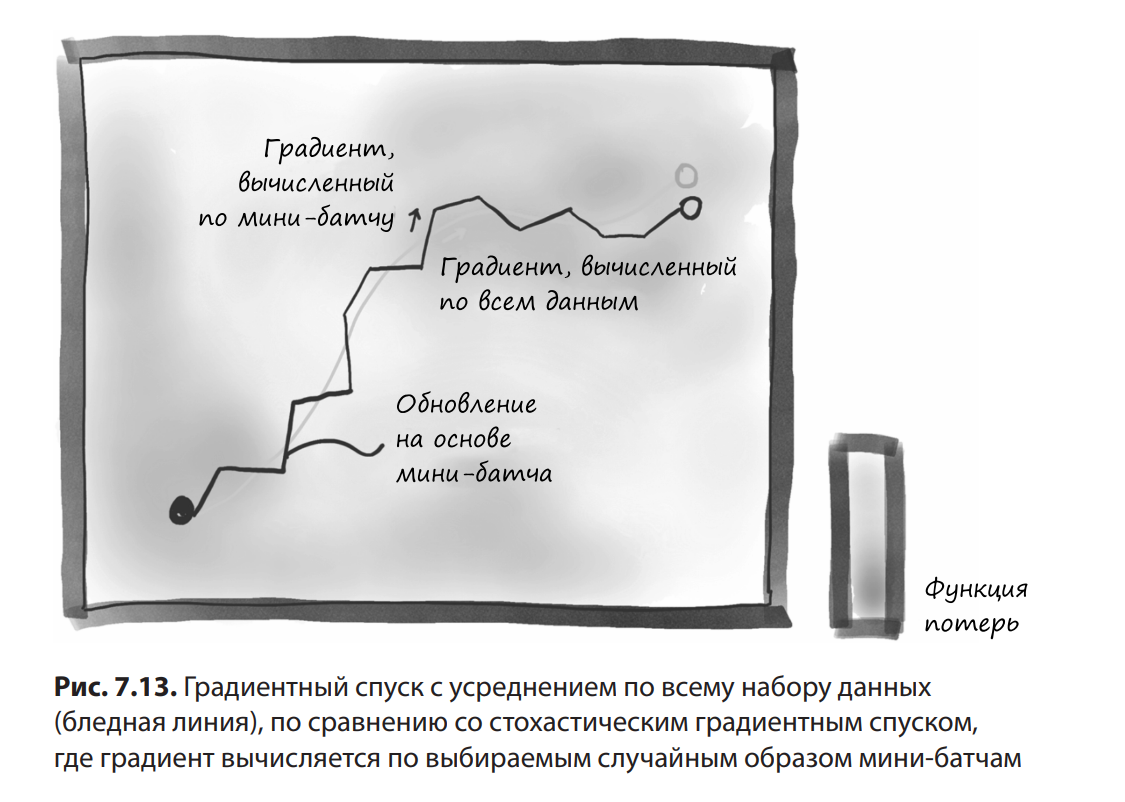

Обычно размер мини-батчей представляет собой константу, задаваемую до обучения, аналогично скорости обучения. Чтобы не путать с параметрами модели,
их называют гиперпараметрами.
В нашем коде обучения размер мини-батчей составляет 1 — мы выбираем по
одному элементу из набора данных за раз. Модуль torch.utils.data включает
класс, помогающий с перетасовкой и организацией данных по мини-батчам:
DataLoader. Задача загрузчика данных состоит в выборе мини-батчей из набора
данных с гибкими возможностями использования различных стратегий выборки. Одна из самых распространенных стратегий: равномерная выборка после
перетасовки данных в каждой эпохе. На рис. 7.14 показан загрузчик данных,
перетасовывающий полученные от Dataset индексы.

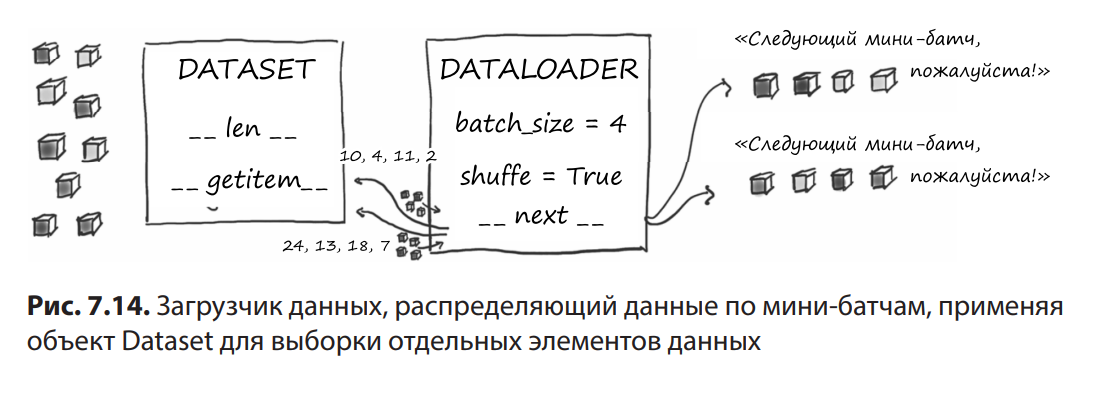

Взглянем, как это происходит. Как минимум конструктору класса DataLoader
необходимо передать объект Dataset, а также аргумент batch_size и булево
значение shuffle, указывающее, необходимо ли перетасовывать данные в начале каждой эпохи:

In [42]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda', index=0)

In [43]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

По объекту DataLoader можно проходить в цикле, поэтому мы можем использовать его непосредственно во внутреннем цикле нашего нового кода обучения

In [44]:
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.LogSoftmax(dim=1)
).to(DEVICE)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100


for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1).to(DEVICE))
        loss = loss_fn(outputs, labels.to(DEVICE))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


Epoch: 0, Loss: 0.389461
Epoch: 1, Loss: 0.586299
Epoch: 2, Loss: 0.405232
Epoch: 3, Loss: 0.273275
Epoch: 4, Loss: 0.559323
Epoch: 5, Loss: 0.411920
Epoch: 6, Loss: 0.481427
Epoch: 7, Loss: 0.512828
Epoch: 8, Loss: 0.390009
Epoch: 9, Loss: 0.231397
Epoch: 10, Loss: 0.395224
Epoch: 11, Loss: 0.294301
Epoch: 12, Loss: 0.136913
Epoch: 13, Loss: 0.206716
Epoch: 14, Loss: 0.198516
Epoch: 15, Loss: 0.546220
Epoch: 16, Loss: 0.268325
Epoch: 17, Loss: 0.316330
Epoch: 18, Loss: 0.312003
Epoch: 19, Loss: 0.431361
Epoch: 20, Loss: 0.197781
Epoch: 21, Loss: 0.405943
Epoch: 22, Loss: 0.314809
Epoch: 23, Loss: 0.738952
Epoch: 24, Loss: 0.283881
Epoch: 25, Loss: 0.236661
Epoch: 26, Loss: 0.308042
Epoch: 27, Loss: 0.194162
Epoch: 28, Loss: 0.226196
Epoch: 29, Loss: 0.220366
Epoch: 30, Loss: 0.190872
Epoch: 31, Loss: 0.275502
Epoch: 32, Loss: 0.167480
Epoch: 33, Loss: 0.141544
Epoch: 34, Loss: 0.160456
Epoch: 35, Loss: 0.171831
Epoch: 36, Loss: 0.198192
Epoch: 37, Loss: 0.145067
Epoch: 38, Loss: 0.257

На каждой итерации внутреннего цикла imgs представляет собой тензор размером 64 × 3 × 32 × 32, то есть мини-батч из 64 RGB-изображений (размером
32 × 32), а labels — тензор размером 64 с индексами меток.

Мы видим, что функция потерь убывает, но мы не знаем, достаточно ли низко
ее значение. А поскольку наша цель тут в том, чтобы правильно присвоить изображениям метки классов, причем желательно на независимом наборе данных,
мы можем вычислить безошибочность нашей модели на проверочном наборе
данных в контексте отношения количества правильных классификаций к общему их числу:

In [45]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
 shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1).to(DEVICE))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels.to(DEVICE)).sum())
        
print(f"Accuracy:  {correct / total}")

Accuracy:  0.8125


Неидеально, но намного лучше, чем гадание наугад. В нашу защиту можно сказать, что наша модель была достаточно неглубоким классификатором; удивительно, что она вообще работает. А работает она потому, что набор данных очень
прост: множество примеров данных двух классов, скорее всего, с формальными
отличиями (например, цвет фона), помогающими модели отличать птиц от
самолетов по всего лишь нескольким пикселям

Безусловно, можно «приукрасить» модель, включив в нее дополнительные слои
и повысив таким образом ее глубину и разрешающие возможности. Вот один
из возможных вариантов

Здесь мы пытаемся аккуратно сократить количество признаков по направлению
к выходному слою в надежде, что промежуточные слои сумеют лучше сжать
информацию во все более короткие промежуточные выходные сигналы

Сочетание nn.LogSoftmax и nn.NLLLoss эквивалентно nn.CrossEntropyLoss. Эта
терминология является особенностью PyTorch, поскольку nn.NLLLoss вычисляет,
по сути, перекрестную энтропию, но с предсказаниями логарифмов вероятности
в качестве входного сигнала, а nn.CrossEntropyLoss вычисляет оценки (иногда называемые логитами (logits)). Формально nn.NLLLoss представляет собой
перекрестную энтропию между распределением Дирака, в котором основной вес
придается целевой величине и предсказанному распределению, определяемому
входными логарифмическими вероятностями.


Еще большую неразбериху вызывает то обстоятельство, что в теории информации, с точностью до нормализации по размеру выборки, эту перекрестную
энтропию можно интерпретировать как отрицательное логарифмическое правдоподобие предсказанного распределения с целевым распределением в качестве
исхода. Таким образом, обе функции потерь являются отрицательными логарифмическими функциями правдоподобия параметров модели для конкретных
данных при предсказании нашей моделью вероятностей (к которым применена
многомерная логистическая функция). В нашей книге эти нюансы неважны, но
если эти термины встретятся вам в литературе — не позволяйте наименованиям
PyTorch запутать вас

Достаточно часто последний слой nn.LogSoftmax не включают в сеть, используя
в качестве функции потерь nn.CrossEntropyLoss. Попробуем этот вариант

Обратите внимание, что числа будут точно такими же, как и для nn.LogSoftmax
и nn.NLLLoss. Просто удобнее делать все за один проход, при этом единственная
проблема будет в том, что выходной сигнал модели нельзя будет интерпретировать как вероятности (или логарифмы вероятностей). Для их получения
придется явным образом пропустить выходной сигнал через многомерную
логистическую функцию

Обучив модель и вычислив степень безошибочности на проверочном наборе
данных (0,802 000), мы видим, что более крупная модель дает прирост безошибочности, но не настолько уж сильный. Безошибочность на обучающем наборе данных практически идеальна (0,998 100). О чем эти числа нам говорят? О том,
что в обоих случаях модель переобучена. Наша полносвязная модель обучается
различать птиц и самолеты на обучающем наборе данных, просто запоминая обучающие примеры, но качество ее работы на проверочном наборе данных будет
не слишком хорошим, даже если выбрать модель покрупнее

PyTorch позволяет быстро выяснить, сколько параметров у модели, с помощью
метода parameters() объекта nn.Model (тот же самый метод, с помощью которого
мы передавали параметры оптимизатору). Чтобы узнать, сколько элементов
в каждом из экземпляров тензоров, можно вызвать метод numel. Их суммирование
покажет нам общее количество. В зависимости от сценария использования, при
подсчете параметров может потребоваться проверить, установлен ли параметр
requires_grad в True, чтобы отделить количество обучаемых параметров от
общего размера модели. Взглянем на нашу текущую ситуацию:

In [46]:
numel_list = [p.numel()
     for p in model.parameters()
     if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

Количество параметров нашей первой модели примерно вдвое меньше, чем последней. Из списка размеров отдельных параметров становится понятно, кто
в этом виноват: первый модуль, включающий 1,5 миллиона параметров. В нашей
полносвязной сети 1024 входных признака, из-за чего первый линейный модуль
насчитывает 3 миллиона параметров. Этого можно было ожидать: мы знаем, что
линейный слой вычисляет y = weight * x + bias, и если длина x равна 3072 (пренебрегая измерением батчей для простоты), а длина y равна 1024, то размер тензора
weight должен быть 1024 × 3072, а bias — 1024. А 1024 × 3072 + 1024 = 3 146 752,
как мы выяснили ранее. Мы можем проверить эти значения напрямую:

О чем это нам говорит? О том, что наша нейронная сеть плохо масштабируется при росте количества пикселей. Что произойдет, если у нас будет RGB изображение 1024 × 1024? Получится 3,1 миллиона входных значений. Даже
в случае 1024 скрытых признаков (что для нашего классификатора не подойдет)
получится более 3 миллиардов параметров. При использовании 32-битных значений float нам сразу понадобится 12 Гбайт оперативной памяти, и это мы даже
еще не затронули второй слой, не говоря уже о вычислении и хранении градиентов. В большинстве современных GPU такая модель попросту не поместится

# Ограничения, накладываемые полносвязностью
***

Давайте обсудим, что влечет за собой использование линейного модуля для
одномерного представления нашего изображения. Происходящее изображено на
рис. 7.15. Это напоминает вычисление линейной комбинации каждого входного
значения — то есть каждого компонента нашего RGB-изображения — со всеми

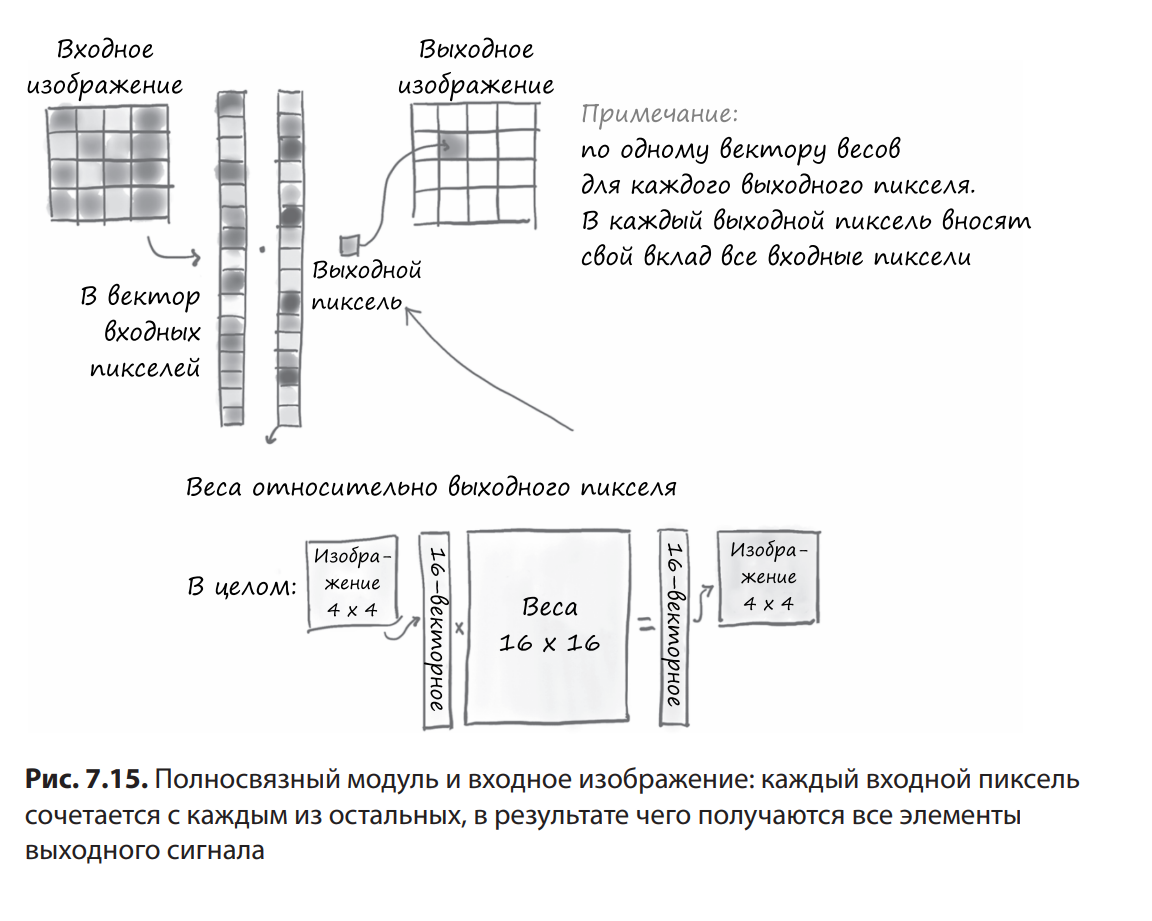

остальными значениями для каждого выходного признака. С одной стороны,
учитывается, что сочетание каждого из пикселей с любым другим пикселем
в изображении может потенциально оказаться важным для нашей задачи. С другой стороны, мы не учитываем относительного местоположения соседних или
удаленных друг от друга пикселей, поскольку рассматриваем изображение как
один большой числовой вектор.

Летящий по небу самолет, захваченный в изображении размером 32 × 32, отдаленно напоминает темный крестик на синем фоне. Полносвязная сеть, такая как
на рис. 7.15, должна усвоить: то, что пиксель 0,1 — темного цвета, пиксель 1,1 —
также темного цвета и т. д., указывает на самолет. Все это показано в верхней
части рис. 7.16. Однако если сдвинуть тот же самый самолет на один пиксель

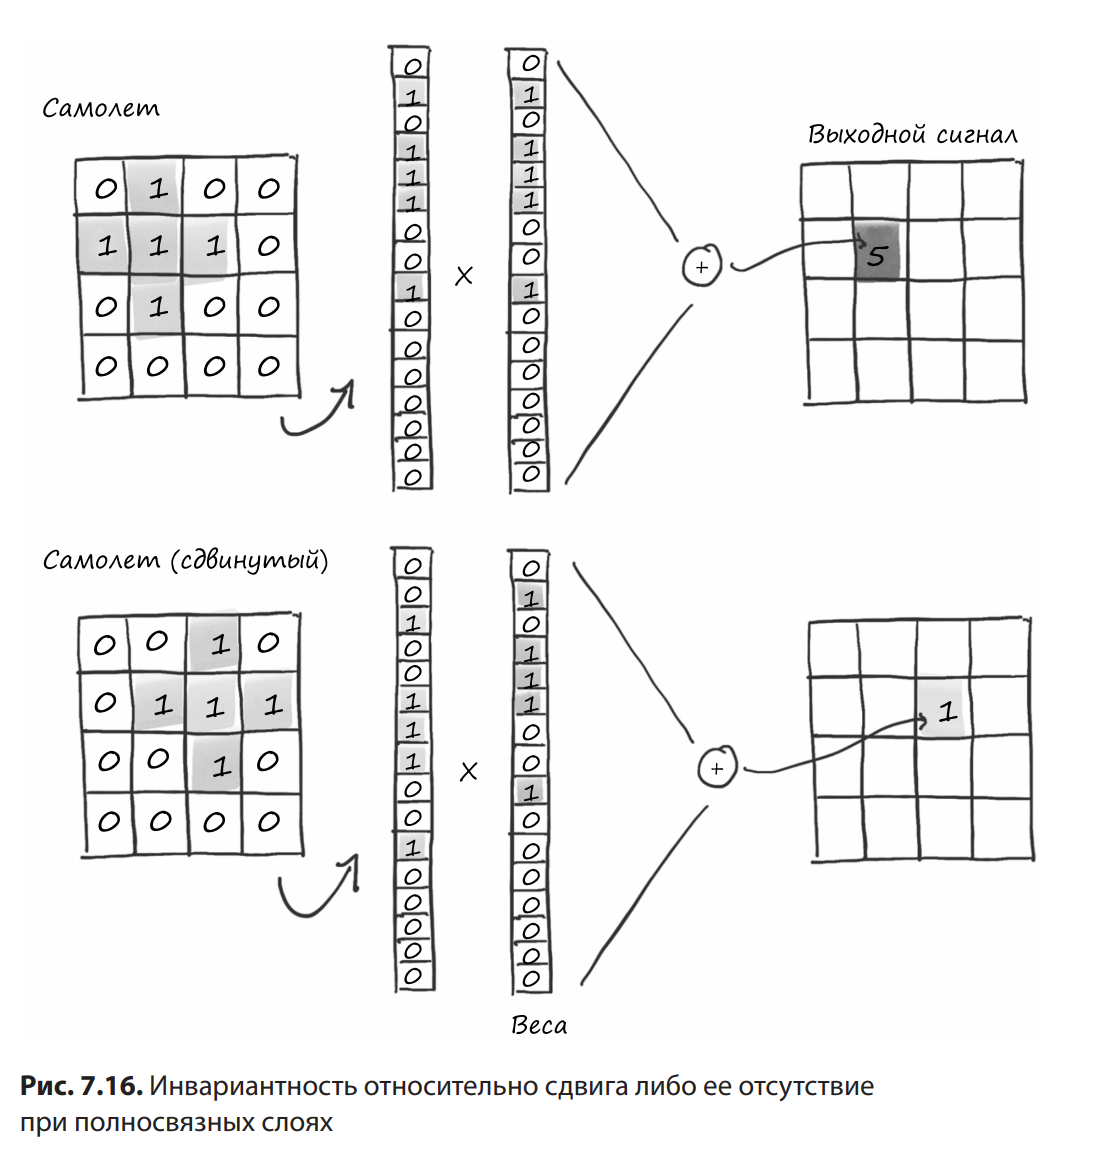

или более, как в нижней части рисунка, то модели придется заново усваивать
взаимосвязь между пикселями с нуля: на этот раз на метку самолета указывает
то, что пиксель 0,2 — темного цвета, пиксель 1,2 — темного цвета и т. д. На более
формальном языке полносвязная сеть не является инвариантной относительно сдвига (translation invariant). Это значит, что сеть, обученная распознавать
«Спитфайр»1
, начинающийся с позиции 4,4, не сможет распознать тот же самый «Спитфайр», начинающийся с позиции 8,8. Нам пришлось бы дополнять
(augment) набор данных, то есть применять случайные сдвиги к изображениям
во время обучения, чтобы сеть могла заметить «Спитфайр» в любом месте
изображения, причем это пришлось бы делать для всех изображений в наборе
(отметим, что для этой цели мы могли бы присоединить к модели соответствующее преобразование из torchvision.transforms). Однако подобное дополнение
данных обходится недешево: количество скрытых признаков, то есть параметров,
должно быть достаточно большим, чтобы хранить информацию обо всех этих
сдвинутых копиях изображений

Итак, к концу данной главы у нас есть набор данных, модель и цикл обучения,
причем наша модель способна обучаться. Однако поскольку структура нашей
сети не соответствует поставленной задаче, модель излишне приспосабливается
к обучающему набору данных, а не усваивает обобщенные признаки того, что
должна обнаруживать

Мы создали модель, способную связывать каждый из пикселей с любым другим
пикселем изображения, вне зависимости от их пространственного расположения. Впрочем, мы сделали обоснованное предположение, что расположенные
ближе друг к другу пиксели теоретически намного сильнее связаны. Это значит,
что мы обучаем не инвариантный относительно сдвига классификатор, так
что нам приходится расходовать немало разрешающих возможностей модели
на усвоение сдвинутых копий изображений, чтобы можно было надеяться на
хорошие результаты на проверочном наборе данных. Должен же существовать
способ получше, правда?

Конечно, большинство таких вопросов в подобной книге — риторические. Для
решения нашего текущего набора задач необходимо внести изменения в модель,
добавив сверточные слои. Мы обсудим, что это такое, в следующей главе.